# 1. Descripción del problema

El problema a tratar por este algoritmo continúa siendo el **problema de ordenamiento**, que consiste en modificar una secuencia de números para que luego de aplicado el algoritmo, los mismos elementos de la secuencia se encuentren en un orden específico. Por ejemplo ordenar los números de un arreglo de menor a mayor o viceversa.

**Entrada:** Secuencia de *n* números $[a_1,a_2,...,a_n]$

**Salida**: Permutación ordenada de la secuencia de entrada: $[a_1',a_2',...,a_n']$, de tal manera que $a_1'\leq a_2' \leq... \leq a_n'$.

**Tamaño del problema:** El tamaño para este problema viende definido por la cantidad *n* de valores a ordenar.


<a href="https://imgur.com/XWBpqxt"><img src="https://i.imgur.com/XWBpqxt.jpg" title="source: imgur.com" /></a>

La diferencia de este algoritmo con el resto, es que logra tener una complejidad temporal lineal de $O(n)$. Esto debido a que no realiza comparaciones entre sus elementos para situarlos de manera ordenada, sino que hace uso de un algoritmo auxiliar llamado Counting Sort, que define las posiciones de los arreglos sin compararlos, sino que mediante un algoritmo de conteo.

# 2. Algoritmos


## 2.1 Counting Sort

### 2.1.1 Descripción

Este código, como se mencionó anteriormente, utiliza una manera distinta a la que se ha visto para generar un arreglo ordenado. Algunas fuentes comparan el método que utiliza con una especie de "hashing", debido a que realiza un algoritmo para determinar la posición de cada elemento del arreglo original, dentro del nuevo arreglo ordenado.

Este algoritmo recibe el arreglo original y crea 2 arreglos adicionales:

* Un primer arreglo llamado ***count***, que tendrá un tamaño igual al rango en el cual se encuentran los elementos del arreglo original. Este se encargará de contar las ocurrencias de cada número dentro del arreglo. 

* Un segundo arreglo con el nombre de ***output*** en el cual se reinsertarán los números, pero de manera ordenada.

La forma en que opera este algoritmo es la siguiente:

1. Se utiliza un primer ciclo para recorrer posición por posición el arreglo de entrada, sumando `1` al índice del arreglo ***count*** correspondiente al número del arreglo original procesado. Es decir, que si en el arreglo original se procesa un número `5`, se sumará `1` en `count[5]`.

2. Se recorrerá nuevamente el arreglo `count` para ir sumando sucesivamente cada posición `count[i]` con la posición `count[i-1]`, para de esta manera ir identificando cuántos números se encontrarán antes de cada número a posicionar en el nuvo arreglo ordenado.

3. Se recorrerá el arreglo original `A` en sentido inverso, y para cada número `A[i]`, se buscará el índice del arreglo `count` que coincida con ese elemento, de esta manera, la posición que ocupará en el nuevo arreglo de salida será determinado por el número que esté dentro del arreglo `count` en ese índice `A[i]`, menos 1. Es importante recalcar que cada vez que se inserte un número dentro del arreglo de salida `output`, se deberá restar 1 al número que se encuentre en el índice `A[i]` del arreglo `count`.

Finalmente se copia el arreglo de salida creado dentro del arreglo original y así este último se encontrará ordenado.

### 2.1.2 Código

In [4]:
def countSort(A, verbose  = False):
	maxNum = int(max(A))
	minNum = int(min(A))
	rango = maxNum - minNum + 1

	if (verbose == True):
		print("Rango: " + str(minNum) + "-" + str(maxNum)) 

  # Crea un arreglo para almacenar el conteo de los números del arreglo a ordenar
  # inicializa arreglos con 0
	count = [0] * rango    # el rango de numeros va a ser el maximo elemento menos el minimo más 1
	output = [0] * len(A)    # arreglo de salida con los valores ordenados

  # Se almacena la cuenta de cada número en el arreglo
	for i in range(0, len(A)):
		if (verbose == True):
			print("Número a procesar: " + "\033[34m" + str(A[i]) + "\033[0m")
		count[A[i] - minNum] += 1
		if (verbose == True):
			print("Se suma un 1 a la posición correspondiente de " + "\033[34m" + str(A[i]) + "\033[0m")
			print("[", end = '')
			for k in range(0, A[i]-minNum):
				print("\033[31m" + str(count[k]) + ", ", end = '')
			print("\033[0m", end = '')

			if(A[i] - minNum != len(count) - 1):
				print("\033[92m" + str(count[A[i] - minNum]) + ", \033[0m", end = '')
			else:
				print("\033[92m" + str(count[A[i] - minNum]), end = '')
	 
			for k in range(A[i]-minNum + 1, len(count)):
				if(k != len(count)-1):
					print("\033[31m" + str(count[k]) + ", ", end = '')
				else:
					print("\033[31m" + str(count[k]), end = '')
		 
			print("\033[0m", end = '')
	 
			print("]\n")
	if(verbose == True):
		print("Conteo final: ",count)
		print("\nSe acumula el conteo\n")
 
 	# Se acumulan los elementos count[i] para que los números contengan la posición correcta en el arreglo de salida

	for i in range(1, len(count)):
		if (verbose == True):
			print("[", end = '')
	 
			for k in range(0, i-1):
				print(str(count[k]) + ", ", end = '')
	 
			if(i != len(count)-1):
				print("\033[92m" + str(count[i-1]) + ", " + str(count[i]) + ", ", end = '')
				print("\033[0m", end = '')
			else:
				print("\033[92m" + str(count[i-1]) + ", " + str(count[i]), end = '')
				print("\033[0m", end = '')
		
			for k in range(i+1, len(count)):
				if(k != len(count)-1):
					print(str(count[k]) + ", ", end = '')
				else:
					print(str(count[k]), end = '')
		 
			print("\033[0m", end = '')
			print("]")
			print(str(count[i-1]) + "+" + str(count[i]) + "\n")
	
		count[i] += count[i-1]

	if(verbose == True):
		print("Conteo final: ",count)
		print("\nSe arma el arreglo de salida\n")
 
  # Se arma el arreglo de salida utilizando las cuentas conseguidas
	for i in range(len(A)-1, -1, -1):
		if (verbose == True):
			print("Número a posicionar del arreglo original: " + "\033[34m" + str(A[i]) + "\033[0m")
			print("Posición correspondiente según count: ")
	 
			print("[", end = '')	
			for k in range(0, A[i] - minNum):
				print("\033[31m" + str(count[k]) + ", ", end = '')
			print("\033[0m", end = '')

			if(A[i] - minNum != len(count) - 1):
				print("\033[34m" + str(count[A[i] - minNum]) + ", \033[0m", end = '')
			else:
				print("\033[34m" + str(count[A[i] - minNum]), end = '')
	 
			for k in range(A[i]-minNum + 1, len(count)):
				if(k != len(count)-1):
					print("\033[31m" + str(count[k]) + ", ", end = '')
				else:
					print("\033[31m" + str(count[k]), end = '')
		 
			print("\033[0m", end = '')
	 
			print("]\n")
	 
		output[count[A[i] - minNum] - 1] = A[i]

		if (verbose == True):
			print("Arreglo de salida: ")

			print("[", end = '')
			for k in range(0, count[A[i] - minNum] - 1):
				print(str(output[k]) + ", ", end = '')
	 
			if(count[A[i] - minNum] - 1 != len(output) - 1):
				print("\033[92m" + str(output[count[A[i] - minNum] - 1]) + ", \033[0m", end = '')
			else:
				print("\033[92m" + str(output[count[A[i] - minNum] - 1]) + "\033[0m", end = '')
		
			for k in range(count[A[i]-minNum], len(output)):
				if(k != len(output)-1):
					print(str(output[k]) + ", ", end = '')
				else:
					print(str(output[k]), end = '')
	 
			print("]\n")

		count[A[i] - minNum] -= 1
 
  # Se copia el arreglo auxiliar de salida en el arreglo de entrada, para que este contenga los números ordenados
	for i in range(0, len(A)):
		A[i] = output[i]
 

A = [4, 5, 4, 3, 4, 9, 1]

print("ENTRADA: ", A)

countSort(A)

print("SALIDA: ", A)

ENTRADA:  [4, 5, 4, 3, 4, 9, 1]
SALIDA:  [1, 3, 4, 4, 4, 5, 9]


Las variables relevantes son:

* `maxNum`, la cual almacena el mayor valor dentro del arreglo.
* `minNum`, la cual almacena el menor valor dentro del arreglo.
* Los arreglos `count` y `output`, los cuales son inicializados en cero para que puedan ser rellenados a medida que transcurre el código.
* `i`, variable la cual recorre los arreglos dependiendo del paso en el que se encuentre el algoritmo. Para el primer ciclo, `i` recorre desde cero hasta el largo del arreglo de entrada. En el segundo va desde uno hasta el final del arreglo `count`, comienza desde el uno porque va sumando cada elemento con su anterior. Finalmente recorre desde el final del arreglo de entrada, hasta la primera posición.

### 2.1.3 Ejecución del código con opción verbose

In [5]:
from random import *

A = [randint(1, 10) for i in range(5)]

print("ENTRADA: ", A)

countSort(A, verbose = True)

print("SALIDA: ", A)

ENTRADA:  [2, 1, 10, 7, 10]
Rango: 1-10
Número a procesar: 2
Se suma un 1 a la posición correspondiente de 2
[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Número a procesar: 1
Se suma un 1 a la posición correspondiente de 1
[1, 1, 0, 0, 0, 0, 0, 0, 0, 0]

Número a procesar: 10
Se suma un 1 a la posición correspondiente de 10
[1, 1, 0, 0, 0, 0, 0, 0, 0, 1]

Número a procesar: 7
Se suma un 1 a la posición correspondiente de 7
[1, 1, 0, 0, 0, 0, 1, 0, 0, 1]

Número a procesar: 10
Se suma un 1 a la posición correspondiente de 10
[1, 1, 0, 0, 0, 0, 1, 0, 0, 2]

Conteo final:  [1, 1, 0, 0, 0, 0, 1, 0, 0, 2]

Se acumula el conteo

[1, 1, 0, 0, 0, 0, 1, 0, 0, 2]
1+1

[1, 2, 0, 0, 0, 0, 1, 0, 0, 2]
2+0

[1, 2, 2, 0, 0, 0, 1, 0, 0, 2]
2+0

[1, 2, 2, 2, 0, 0, 1, 0, 0, 2]
2+0

[1, 2, 2, 2, 2, 0, 1, 0, 0, 2]
2+0

[1, 2, 2, 2, 2, 2, 1, 0, 0, 2]
2+1

[1, 2, 2, 2, 2, 2, 3, 0, 0, 2]
3+0

[1, 2, 2, 2, 2, 2, 3, 3, 0, 2]
3+0

[1, 2, 2, 2, 2, 2, 3, 3, 3, 2]
3+2

Conteo final:  [1, 2, 2, 2, 2, 2, 3, 3, 3, 5]

Se arma el 

Las impresiones en caso de que la opción verbose esté activada ilustran lo que va sucediendo con el arreglo en los 3 pasos descritos anteriormente. Se muestra cómo va aumentando la cuenta de cada número del arreglo original en `count`, luego se imprime la acumulación de los elementos de este último arreglo, y finalmente se muestra cómo se va armando el arreglo de salida.

## 2.2 Radix Sort



### 2.2.1 Descripción



El algoritmo de Radix Sort consiste en el ordenamiento de un arreglo o lista de números que usa como criterio para intercambiar cada número, el orden en el cual debería estar cada dígito de los elementos de entrada, yendo desde la cifra menos significante hasta la más significante de ellos.

**Entrada:** Un arreglo o lista con n cantidad de números.

**Salida:** El mismo arreglo con exactamente los mismos elementos pero ordenados de menor a mayor.

Este arreglo requiere de un algoritmo adicional de ordenamiento para lograr su correcto funcionamiento, el cual debe tener la característica de ser **estable**, es decir, que para el arreglo de salida, mantenga el orden relativo en el cual se encontraban los elementos repetidos dentro arreglo de entrada.

### 2.2.2 Código

Para este código del Radix Sort, el algoritmo auxiliar que ayuda a ordenar el arreglo será el Counting Sort, debido a que es precisamente un algoritmo estable y que funciona especialmente bien cuando sabemos el rango en el cual se pueden estar los elementos del arreglo `count`. En este caso, se utilizará una variante del código mostrado en la sección anterior, ya que como se va a definir la posición de cada número según el dígito de este que se esté procesando, se sabe que estos se mueven en un rango de 0 a 9, por lo cual el arreglo `count` solo tendrá índices en ese rango. Asimismo, para insertar cada elemento también habrá una variación, debido a que se trabajará con potencias de 10 para saber en base a cuál dígito se irá aumentando la cuenta, y así determinar la posición del número en el arreglo `output`.

In [6]:
def countSort2(arr, exp):
 
    n = len(arr)
 
    # Arreglo de salida
    output = [0] * (n)
 
    # Arreglo count
    count = [0] * (10)
 
    # Se guardan las ocurrencias de cada dígito en count
    for i in range(0, n):
        index = arr[i] // exp    # Cada elemento se divide en la potencia de 10 correspondiente
        count[index % 10] += 1    # Luego se saca el módulo de 10 del resultado para determinar el índice correspondiente al cual sumar 1
 
    #Acumulación de los elementos de count para definir correctamente las posiciones finales (igual que en el código anterior)
    for i in range(1, 10):
        count[i] += count[i - 1]
 
    # Construcción del arreglo de salida (igual que en el código anterior)
    i = n - 1
    while i >= 0:
        index = arr[i] // exp
        output[count[index % 10] - 1] = arr[i]
        count[index % 10] -= 1
        i -= 1
 
    #Se copia el arreglo de salida en el de entrada (igual que en el código anterior)

    i = 0
    for i in range(0, len(arr)):
        arr[i] = output[i]

def radixSort(A):
 
    # Encuentra el número con mayor cantidad de dígitos en el arreglo
    max1 = max(A)
 
    # Se realiza counting sort según cada dígito de los números del arreglo
    # se traspasa la potencia de 10 con la cual se determinará en base a cuál dígito se ordenará

    exp = 1
    while max1 / exp >= 1:
        countSort2(A, exp)
        exp *= 10

A = [170, 45, 75, 90, 802, 24, 2]

print("ENTRADA: ", A)
# Function Call
radixSort(A)
 
print("SALIDA: ", A)

ENTRADA:  [170, 45, 75, 90, 802, 24, 2]
SALIDA:  [2, 24, 45, 75, 90, 170, 802]


Las variables relevantes son:

* `max1`, la cual almacena el mayor valor dentro del arreglo.
* `exp`, la cual almacena el valor al cual se eleva el diez. Esto determinará el dígito en base al cual se está trabajando. Por ejemplo si `exp = 2` esto quiere decir que se estará trabajando en base a $10^2$, lo cual corresponde a la centena de cada número del arreglo.

### 2.3.3 Ejemplo

En la siguiente imagen se iluistrará y luego se explicará un ejemplo del uso de Merge Sort para el arreglo `A = [170, 45, 75, 90, 802, 24, 2]`:

<a href="https://imgur.com/rZawqAD"><img src="https://i.imgur.com/rZawqAD.jpg" title="source: imgur.com" /></a>

* **Columna 1:** Para este primer paso, se observa el arreglo completamente desordenado, tal como entra al algoritmo. Es en este momento que se aplicará el orden por la **unidad** de cada número, es decir, por el dígito correspondiente a $10^0$.

* **Columna 2:** En esta segunda columna, vemos cómo los elementos han cambiado de posición y las unidades de cada número se sencuentran ordenadas. Es a esta segunda columna a la cual se le aplicará nuevamente el Counting Sort pero considerando el orden por la **decena**, es decir $10^1$.

* **Columna 3:** Para la penúltima columna, tenemos ordenados los números segun sus decenas. Nótese que se van colocando en los primeros lugares a los números que tienen algún $0$ o un espacio vacío en ese dígito.

* **Columna 4:** Finalmente tenemos el arreglo de salida, al cual se le aplicó un orden por la **centena**, es decir $10^2$, dejando nuevamente en primer lugar a aquellos números que no presentan un dígito en esa posición y al final a aquellos que sí lo tienen, se dejan en orden de menor a mayor, dando como resultado, el arreglo de salida completamente ordenado.

Luego de analizar el ejemplo, es que se observa la importancia de que el algoritmo que se utilice para ordenar los dígitos en cada paso del algoritmo sea estable, debido a que cuando se tiene que definir el orden de números que contengan algún dígito igual, se colocará primero al número que en el paso anterior haya quedado antes. Esto hace que por ejemplo, en el último paso, los números 2 y 24 queden en una posición correcta a pesar de que ambos tienen un espacio vacío en la centena. Debido a que el número 2 estaba antes que el 24 en la entrada, para la salida se mantendrá así, sin alterar el orden final.

# 3. Propidades del algoritmo

## 3.1 Correctitudes

### 3.2.1 Teorema de correctitud Counting Sort

El algoritmo Counting Sort, luego de ser aplicado sobre un arreglo $[a_1,a_2, \ldots ,a_n]$, con sus números distribuidos en un rango de {$0,1, \ldots,k$}, genera un nuevo arreglo ordenado $[a_1',a_2', \ldots ,a_n']$, tal que $a_1' \leq a_2' \leq \ldots \leq a_n'$.

**Prueba del teorema**

Para la comprobación de la correctitud del algortimo se utilizará el método de inducción, el cual ya ha sido explicado en informes anteriores.

**Caso base**

Cuando el tamaño del arreglo de entrada es $n=1$, y el número que está dentro de este es una constante $k$, el algoritmo Counting Sort genera un arreglo auxiliar que irá del rango {$0, k$}, después de realizar el conteo y posterior suma, se llegará a la conclusión de que no existe ningún otro número menor a $k$ dentro del arreglo de entrada, por lo cual luego el algoritmo posicionará a este número en la primera y única posición del arreglo de salida, el cual estará trivialmente ordenado.

**Paso inductivo**

Cuando se tiene un arreglo de tamaño $n > 1$, el algortitmo Counting Sort recorrerá todas las posiciones e irá a contando las ocurrencias de cada elemento $k$ dentro del arreglo `count`. Luego de sumar secuencialmente las ocurrencias de cada número dentro del arreglo de entrada, el arreglo obtendrá cuántos elementos son menores o iguales a $k$. De esta forma, el algoritmo se basará en eso para determinar su nueva posicion de dentro del arreglo de salida. Si en algún caso se llegase a repetir este número, el algoritmo resta en uno la cuenta al insertar cada número en el arreglo de salida, por lo cual este elemento repetido $k'$ se colocará en la posición inmediatamente anterior a $k$, generando así un arreglo de salida completamente ordenado.



### 3.2.2 Teorema  de correctitud de algoritmo Radix Sort

El algoritmo Radix Sort, luego de ser aplicado en un arreglo del orden $[a_1,a_2, \ldots ,a_n]$, genera un nuevo arreglo $[a_1',a_2', \ldots ,a_n']$ el cual cumple las condiciones de tener los mismos elementos del arreglo original, pero ordenados de **menor a mayor**, es decir $a_1' \leq a_2' \leq \ldots \leq a_n'$ 

**Prueba del teorema**

Para la comprobación de la correctitud de este algoritmo también se utilizará la inducción.

**Caso base**

El caso base ocurre cuando se quieren ordenar números de un solo dígito, ahí el algoritmo Radix se limita a solamente hacer uso del algoritmo Counting Sort, el cual ya ha sido comprobada su correctitud, por lo cual el arreglo de salida se encontrará ordenado y Radix Sort funciona correctamente.

**Paso inductivo**

Para este se analiza lo que ocurre cuando se quieren ordenar números con uno o más dígitos. Para este caso, se utiliza la propiedad estable de Counting Sort, la cual nos indica que para números repetidos, el algoritmo posicionará antes en el arreglo de salida al número que se encontraba antes en el arreglo de entrada.

Es debido a esto que para cuando se quiere ordenar números con uno o más dígitos el algoritmo Radix ordena primeramente por el dígito menos significativo de menor a mayor. Luego, al pasar al siguiente dígito significativo, también ordenará de menor a mayor, y en caso de estos ser iguales, se mantendrá el orden del paso anterior, haciendo que el algoritmo resulte correctamente. (Se recomienda mirar imagen de ejemplo de la sección anterior para mejor comprensión).

## 3.1 Tiempo de ejecución de Radix Sort

Para el tiempo de ejecución de este algoritmo, se debe analizar el comportamiento de este según su entrada, por lo que tenemos la siguiente representación:

$T(n) =  Θ(d(n+k))$  

Esto es debido a que el algoritmo estable que utiliza Radix Sort es el Counting Sort, el cual tiene una complejidad de $O(n+k)$, la cual es multiplicada por $d$, siendo este la cantidad de pasos de ordenamiento que se deben realizar, determinado por la cantidad de dígitos del número más grande del arreglo.

Es importante recalcar que cuando $d$ es una constante y $k$ oscila entre valores no muy grandes como ocurre por ejemplo para el ordenamiento de números naturales, cuyos dígitos oscilan entre los valores $0$ y $9$. La complejidad temporal de este algoritmo termina siendo lineal del orden $O(n)$.

# 4. Experimentos

In [10]:
#Algoritmo extraído desde https://www.geeksforgeeks.org/bucket-sort-2/

def bucketSort(arr, noOfBuckets):
    max_ele = max(arr)
    min_ele = min(arr)
  
    # range(for buckets)
    rnge = (max_ele - min_ele) / noOfBuckets
  
    temp = []
  
    # create empty buckets
    for i in range(noOfBuckets):
        temp.append([])
  
    # scatter the array elements
    # into the correct bucket
    for i in range(len(arr)):
        diff = (arr[i] - min_ele) / rnge - int((arr[i] - min_ele) / rnge)
  
        # append the boundary elements to the lower array
        if(diff == 0 and arr[i] != min_ele):
            temp[int((arr[i] - min_ele) / rnge) - 1].append(arr[i])
  
        else:
            temp[int((arr[i] - min_ele) / rnge)].append(arr[i])
  
    # Sort each bucket individually
    for i in range(len(temp)):
        if len(temp[i]) != 0:
            temp[i].sort()
  
    # Gather sorted elements 
    # to the original array
    k = 0
    for lst in temp:
        if lst:
            for i in lst:
                arr[k] = i
                k = k+1

arr = [9, 0, 10, 1, 3, 3, 5, 8, 4, 7]
noOfBuckets = 5
bucketSort(arr, noOfBuckets)
print("Sorted array: ", arr)

Sorted array:  [0, 1, 3, 3, 4, 5, 7, 8, 9, 10]


In [24]:
def insertionSort(array, verbose = False): #Argumentos: El arreglo a ordenar + opción verbose para ver el paso a paso
  if verbose == True:
    print("\n")

  comp = 0 #comparaciones
  permut = 0 #permutaciones

  for i in range (1,len(array)): #Ciclo más grande, es el que realiza cada paso del algoritmo
    key = array[i] #Se guarda número a ubicar
    j = i-1

    if verbose == True:
      print("Pasada", i)
      print("arreglo al inicio:", array)
      print("Número a posicionar:", array[i])

    while 1:
      comp += 1
      if j >= 0 and key < array[j]:
        permut+=1
        #Si el número es mayor al de su izquierda, se intercambian de posición entre ellos
        array[j+1] = array[j]
        array[j] = key
        j-=1 #Se modifica variable j para seguir recorriendo el arreglo hacia la izquierda hasta llegar a la posición 0
      else:
        break #De no ser necesario una permutación, se sigue avanzando para el siguiente número
    
    if verbose == True:
      print("Partes ordenadas del arreglo luego de permutar:")
      print("[", end = '')

      for k in range(0, i): #Coloreado del arreglo para una mejor comprensión de este
        print("\033[92m" + str(array[k]) + ", ", end = '')
      for l in range(i, len(array)):
        if(l != len(array)-1):
          print("\033[0m" + str(array[l]) + ", ", end = '')
        else:
          print("\033[0m" + str(array[l]), end = '')

      print("]\n")

  return comp, permut

arr = [9, 0, 10, 1, 3, 3, 5, 8, 4, 7]
insertionSort(arr)
print("Sorted array: ", arr)

Sorted array:  [0, 1, 3, 3, 4, 5, 7, 8, 9, 10]


In [30]:
Contador1 = 0 #Contador de llamadas recursivas
Contador2 = 0 #Contador de comparaciones

def MergeSort(array, verbose = False):
	global Contador1

	if (len(array) <= 1): #Caso base: si el tamaño del arreglo es 0 o 1 retorna el arreglo tal cual pues ya está ordenado
		Contador1 += 1
		return array
 
 	#Se divide el arreglo original en dos mitades y se les aplica Merge Sort de manera recursiva
	medio = len(array) // 2
	der = MergeSort((array[:medio]), verbose)
	Contador1 += 1
	izq = MergeSort((array[medio:]), verbose)
	Contador1 += 1

	return Merge(der, izq, verbose)  #Se juntan ambos arreglos

def Merge(A, B, verbose):
	#Variables auxiliares para recorrer sub-arreglos
	i = 0
	j = 0
	global Contador2
	C = []

	if(verbose == True):
		print("Arreglo izquierdo: " + "\033[33m" + str(A))
		print("\033[0m")
		
		print("Arreglo derecho: " + "\033[31m" + str(B))
		print("\033[0m")
	
	while(i < len(A) and j < len(B)):  #Se va insertando el menor elemento de cada sub arreglo en el arreglo combinado
		Contador2 += 1
		if(A[i] < B[j]):
			C.append(A[i])
			i+=1
		else:
			C.append(B[j])
			j+=1
		
	#Se agregan todos los elementos restantes de los sub-arreglos
	C += A[i:]
	Contador2 += len(A[i:])
	C += B[j:]
	Contador2 += len(B[j:])

	if verbose == True:
		print("Arreglo resultante: " + "\033[34m" + str(C))
		print("\033[0m")

	return C  #Se juntan ambos arreglos

arr = [9, 0, 10, 1, 3, 3, 5, 8, 4, 7]
arr = MergeSort(arr)
print("Sorted array: ", arr)

Sorted array:  [0, 1, 3, 3, 4, 5, 7, 8, 9, 10]


## 4.2 Comparación con Bucket Sort

El algoritmo Radix es usualmente comparado con Bucket Sort, debido a que ambos tienen la característica de operar en un tiempo lineal, sin embargo, el segundo es utilizado usualmente para valores decimales y funciona correctamente para valores enteros no muy grandes. 

Es por esto que para los experimentos no se utilizará un rango demasiado amplio de números, para asegurar un correcto funcionamiento del Bucket Sort.

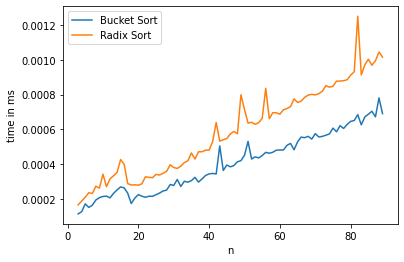

In [40]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x = []; y1 = [] ; y2 = []

for n in range(3,90):

  a = random.sample(range(10, 100), n)

  t = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a}, {5})", repeat=1, number=10)

  k = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(k)


plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Bucket Sort", "Radix Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Luego de analizar ambos gráficos, se ven unas gráficas relativamente uniformes a lo largo del experimento. Es importante resaltar que los picos de rendimiento que se observan se podrían deber a condiciones del procesador debido a que estuvieron presentes durante todas las ejecuciones realizadas para la realización de la gráfica. Aún así se puede apreciar cómo a lo largo del gráfico el Bucket Sort se desempeña en un tiempo menor al Radix.

Lo anterior se puede deber principalmente a los algoritmos auxiliares que utiliza cada uno. Mientras el Bukcet Sort utiliza el Insertion Sort, el cual a priori es más lento que Counting Sort, lo utiliza para listas relativamente pequeñas, con lo cual el tiempo de ejecución teórico se ve reducido en la práctica. Por otro lado el Radix Sort utiliza un mayor tiempo debido a la cantidad de veces que se tiene que recorrer el arreglo original y el arreglo `count`.

## 4.1 Comparación con algoritmos de ordenamiento de diferente complejidad

Hasta este informe se han estudiado diferentes tipos de algoritmos de ordenamiento, siendo el Radix Sort el de menor complejidad temporal de forma teórica. Es por esto que para el siguiente experimento se observará en la práctica cómo es que se comporta a comparación de un algoritmo con complejidad $O(n^2)$ como lo es el Insertion Sort, y a comparación de Merge Sort, el cual tiene una complejidad de $O(nlog(n))$

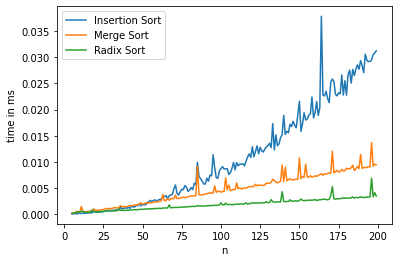

In [42]:
x = []; y1 = [] ; y2 = [] ; y3 = []

for n in range(5,200):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)

  k = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)

  u = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(k)
  y3.append(u)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["Insertion Sort", "Merge Sort", "Radix Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Como era de esperarse, los tiempos de ejecución son relativamente parejos para arreglos pequeños. A partir de 50 aproximadamente es que se evidencia claramente la diferencia en el rendimiento de cada uno de los algoritmos.

Se puede observar un crecimiento cuadrático para Insertion Sort, un rendimiento relativamente lineal para Merge Sort, y un crecimiento mucho más lento para el Radix Sort.

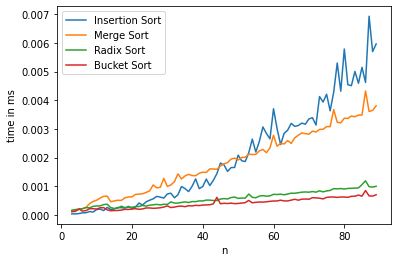

In [43]:
x = []; y1 = [] ; y2 = [] ; y3 = [] ; y4 = []

for n in range(3,90):

  a = random.sample(range(10, 100), n)

  t = repeat(setup="from __main__ import insertionSort", stmt=f"insertionSort({a})", repeat=1, number=10)

  k = repeat(setup="from __main__ import MergeSort", stmt=f"MergeSort({a})", repeat=1, number=10)

  u = repeat(setup="from __main__ import radixSort", stmt=f"radixSort({a})", repeat=1, number=10)

  v = repeat(setup="from __main__ import bucketSort", stmt=f"bucketSort({a}, {5})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(k)
  y3.append(u)
  y4.append(v)

plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.plot(x,y4)

plt.legend(["Insertion Sort", "Merge Sort", "Radix Sort", "Bucket Sort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Si ingresamos el Bucket Sort a la comparativa, vemos que se mantiene la misma relación entre los algoritmos $O(n)$ a lo largo de toda la gráfica, excepto al inicio cuando el tamaño del arreglo es muy pequeño y el Insertion Sort resulta ser el más rápido (los picos de rendimiento se deben exclusivamente a características del procesador).